In [19]:
import numpy as np
import matplotlib.pyplot as plt
import ot 

import sys
sys.path.append("../src")
from utility import PRHCP,HCP

# Effectiveness and robustness of PRHCP

In [20]:
# we take exactly the same simulation as that in PRW and SRW,
# and our PRHCP is robust to random noise dimension too.
# What's more, PRHCP need O(n) time.
d = 50
q = [2,4,7,10]
n = 100
R = 10
D = 30

L = len(q)

prhcp = np.zeros((L,D))
vprhcp = np.zeros((L,D))

a = np.ones(n)/n
b = np.ones(n)/n
 
np.random.seed(1)

for i in range(L):
    for j in range(D):
        temp = np.zeros(R)
        for r in range(R):

            X = np.random.random((n,d))*2-1
            Y = X.copy()
            Y[:,0:q[i]] += 2*np.sign(X[:,0:q[i]])

            temp[r] = PRHCP(X,Y,q=j+1,niter=10)[1]

        prhcp[i,j] = np.mean(temp)
        vprhcp[i,j] = np.std(temp)

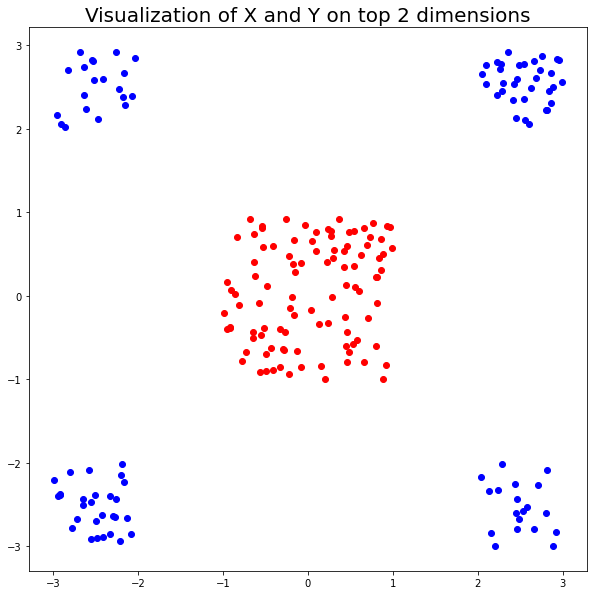

In [21]:
# X and Y visualization
# top q dimensions are different, last d-q are random noise
plt.figure(figsize=(10,10))
plt.title('Visualization of X and Y on top 2 dimensions',fontsize=20)
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(Y[:,0],Y[:,1],c='b')

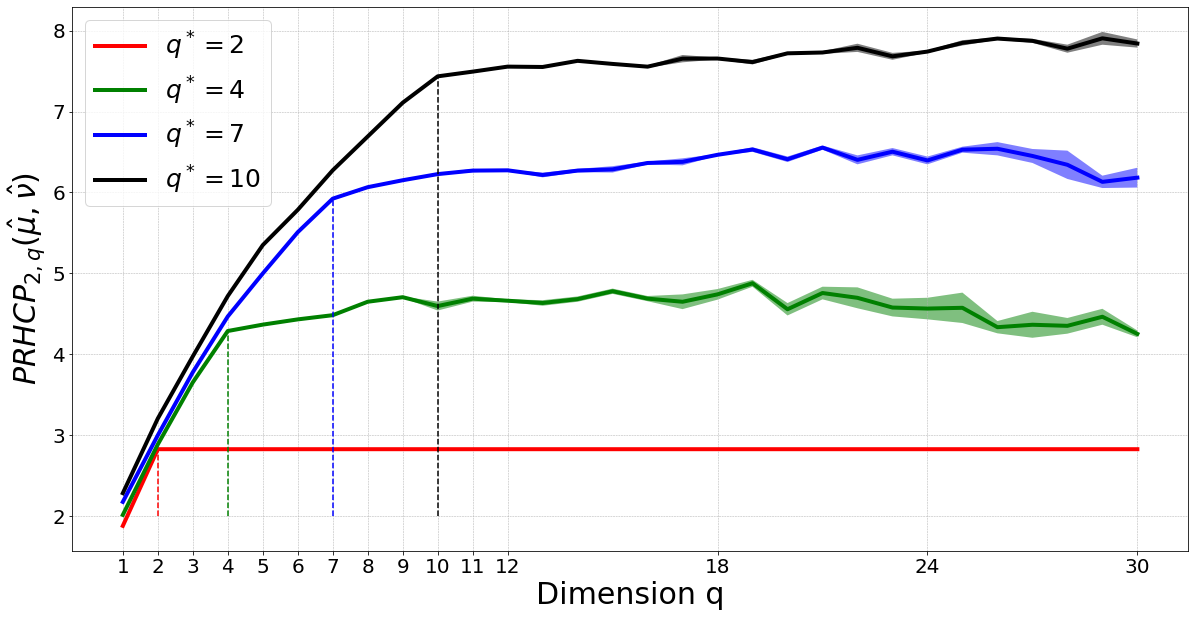

In [22]:
prhcpm = prhcp
vprhcpm = vprhcp**2
ss = 2

plt.figure(figsize=(20,10))
plt.plot(np.arange(1,D+1,1),prhcpm[0,:],c='r',label=r'$q^*=2$',linewidth=4)
plt.fill_between(np.arange(1,D+1,1), prhcpm[0,:]-vprhcpm[0,:], prhcpm[0,:]+vprhcpm[0,:], facecolor='r', alpha=0.5)
plt.plot([q[0],q[0]], [ss,prhcpm[0,q[0]-1]], linestyle='--', c='r')

plt.plot(np.arange(1,D+1,1),prhcpm[1,:],c='g',label=r'$q^*=4$',linewidth=4)
plt.fill_between(np.arange(1,D+1,1), prhcpm[1,:]-vprhcpm[1,:], prhcpm[1,:]+vprhcpm[1,:], facecolor='g', alpha=0.5)
plt.plot([q[1],q[1]], [ss,prhcpm[1,q[1]-1]], linestyle='--', c='g')

plt.plot(np.arange(1,D+1,1),prhcpm[2,:],c='b',label=r'$q^*=7$',linewidth=4)
plt.fill_between(np.arange(1,D+1,1), prhcpm[2,:]-vprhcpm[2,:], prhcpm[2,:]+vprhcpm[2,:], facecolor='b', alpha=0.5)
plt.plot([q[2],q[2]], [ss,prhcpm[2,q[2]-1]], linestyle='--', c='b')

plt.plot(np.arange(1,D+1,1),prhcpm[3,:],c='k',label=r'$q^*=10$',linewidth=4)
plt.fill_between(np.arange(1,D+1,1), prhcpm[3,:]-vprhcpm[3,:], prhcpm[3,:]+vprhcpm[3,:], facecolor='k', alpha=0.5)
plt.plot([q[3],q[3]], [ss,prhcpm[3,q[3]-1]], linestyle='--', c='k')


plt.legend(fontsize=25,loc='upper left')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('Dimension q', fontsize=30)
plt.ylabel(r'$PRHCP_{2,q}(\hat{\mu},\hat{\nu})$', fontsize=30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,18,24,30],fontsize=20)
plt.yticks([2,3,4,5,6,7,8],fontsize=20)
# plt.savefig("./prhcp_k.pdf", format="pdf", bbox_inches="tight")
plt.show()
